In [1]:
from coreLib.dataset import DataSet
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/"
ds=DataSet(data_dir)

#LOG     :All paths found


  0%|          | 1391/1059977 [00:00<01:20, 13102.87it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 563634.38it/s]


#LOG     :converting int labels to string


  1%|          | 3518/370098 [00:00<00:10, 35179.03it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 251421.76it/s]


#LOG     :bangla.graphemes


100%|██████████| 72045/72045 [00:00<00:00, 3779642.42it/s]


#LOG     :bangla.numbers
#LOG     :english.graphemes


100%|██████████| 982/982 [00:00<00:00, 3418096.70it/s]


#LOG     :english.numbers
#LOG     :common.symbols
#LOG     :bangla.fonts
#LOG     :english.fonts
#LOG     :common.background
#LOG     :common.noise.random


100%|██████████| 3240/3240 [00:00<00:00, 4244080.25it/s]

#LOG     :common.noise.sign


In [2]:
from coreLib.render import createSceneImage,backgroundGenerator,createImageData
from coreLib.config import config
backGen=backgroundGenerator(ds,dim=(config.back_dim,config.back_dim))
back=next(backGen)

100%|██████████| 982/982 [00:00<00:00, 1894575.22it/s]


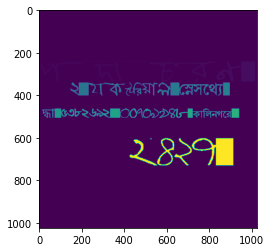

[[{3: 'প', 4: 'দা', 5: 'চ', 6: 'র', 7: 'ণ', 8: ' '}], [{90: '২', 91: ' '}, {92: 'য', 93: 'ক', 94: 'টে', 95: 'রি', 96: 'য়া', 97: 'ল', 98: ' '}, {99: 'স্নে', 100: 'স', 101: 'থ্যে', 102: ' '}], [{126: 'দ্ধা', 127: ' '}, {128: '৫', 129: '৩', 130: '৮', 131: '২', 132: '৬', 133: '৯', 134: '২', 135: ' '}, {136: '০', 137: '০', 138: '৭', 139: '০', 140: '৯', 141: '৯', 142: '৪', 143: '৮', 144: ' '}, {145: 'কা', 146: 'লি', 147: 'ন', 148: 'গ', 149: 'রে', 150: ' '}], [{231: '২', 232: '৪', 233: '২', 234: '৭', 235: ' '}]]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np

page,labels=createSceneImage(ds)

plt.imshow(page)
plt.show()
print(labels)

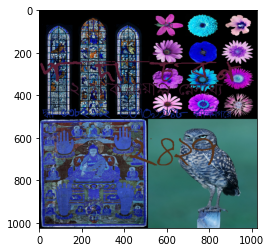

In [5]:
back=createImageData(backGen,page,labels)
plt.imshow(back)
plt.show()

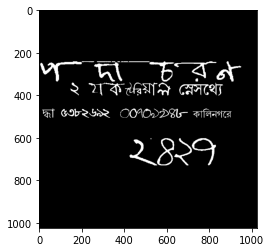

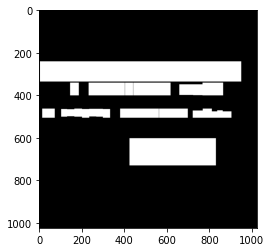

["x: [[  4   4 949 949]], y: [[241 335 335 241]], ornt: ['h'], transcriptions: ['পদাচরণ']", "x: [[146 146 186 186]], y: [[341 400 400 341]], ornt: ['h'], transcriptions: ['২']", "x: [[443 443 617 617 404 404 441 441 233 233 402 402]], y: [[341 400 400 341 341 400 400 341 341 400 400 341]], ornt: ['h'], transcriptions: ['যকটেরিয়াল']", "x: [[768 768 767 659 659 723 724 767 768 864 864]], y: [[341 348 349 349 398 398 399 399 400 400 341]], ornt: ['h'], transcriptions: ['স্নেসথ্যে']", "x: [[15 15 73 73]], y: [[463 505 505 463]], ornt: ['h'], transcriptions: ['দ্ধা']", "x: [[166 166 165 132 131 104 104 131 131 132 165 166 166 201 202 202 235 235\n  236 268 269 299 300 300 333 333 300 299 236 235 202 201 201]], y: [[463 465 466 466 465 465 500 500 499 498 498 499 500 500 501 505 505 500\n  499 499 500 500 501 505 505 465 465 464 464 465 465 464 463]], ornt: ['h'], transcriptions: ['৫৩৮২৬৯২']", "x: [[564 564 698 698 381 381 562 562]], y: [[463 505 505 463 463 505 505 463]], ornt: ['h'], trans

In [6]:
from coreLib.format import convertToTotalText

charmap,wordmap,lines=convertToTotalText(page,labels)
plt.imshow(charmap)
plt.show()
plt.imshow(wordmap)
plt.show()
print(lines)
